# Moth-Flame Optimization Algorithm

In [0]:
import numpy as np
import matplotlib.pyplot as plt

Define the random initialization function

In [0]:
def initialization(nsa, dim, ub, lb):
    ''' This function creates the first random population of moths '''
    return np.random.rand(nsa, dim)*(ub-lb) + lb

Define the main function that optimizes a given function

In [0]:
def MFO(nsa, dim, ub, lb, max_iter, fobj):
  ''' 
  Main function 
  Parameters :
    - nsa : Number of Search Agents
    - dim : Dimension of Search Space
    - ub : Upper Bound
    - lb : Lower Bound
    - max_iter : Number of Iterations
    - fobj : Objective Function (Fitness Function)
  Returns :
    - bFlameScore : Best Flame Score
    - bFlamePos : Best Flame Position
    - ConvergenceCurve : Evolution of the best Flame Score on every iteration
  '''

  mothPos = initialization(nsa, dim, ub, lb) # Initialize the positions of moths

  convergenceCurve = np.zeros(shape=(max_iter))

  previousPop, previousFit, doublePop, doubleFit = None, None, None, None

  for iter in range(max_iter): # Main loop
    flameNo = np.int(nsa-iter*((nsa-1)/max_iter)) # Number of flames Eq. (3.14) in the paper

    # Check if moths go out of the search spaceand bring it back
    flag4ub = mothPos > ub
    flag4lb = mothPos < lb
    mothPos = mothPos * np.logical_not(flag4ub + flag4lb) + ub*flag4ub + lb*flag4lb

    # Calculate the fitness of moths
    mothFit = fobj(mothPos)

    if iter == 0:
      # Sort the first population of moths
      order = mothFit.argsort()
      mothFit = mothFit[order[::1]]
      mothPos = mothPos[order[::1], :]
      
      # Update the flames
      bFlames = mothPos
      bFlamesFit = mothFit

    else:
      # Sort the moths
      doublePop = np.vstack((previousPop, bFlames))
      doubleFit = np.hstack((previousFit, bFlamesFit))

      order = doubleFit.argsort()
      doubleFit = doubleFit[order]
      doublePop = doublePop[order, :]
      
      # Update the flames
      bFlames = doublePop[:nsa, :]
      bFlamesFit = doubleFit[:nsa]

    # Update the position best flame obtained so far
    bFlameScore = bFlamesFit[0]
    bFlamesPos = bFlames[0, :]

    previousPop = mothPos
    previousFit = mothFit

    # a linearly dicreases from -1 to -2 to calculate t in Eq. (3.12)
    a = -1 + iter * ((-1)/max_iter)

    # D in Eq. (3.13)
    distanceToFlames = np.abs(bFlames - mothPos)
    b = 1
    t = (a-1)*np.random.rand() + 1
    # Update the position of the moth with respect to its corresponsing flame if
    # the moth position is less than the number of flames calculated, otherwise
    # update the position of the moth with resepct to the last flame
    bFlames = bFlames[:flameNo, :]
    temp = bFlames[flameNo-1, :]*np.ones(shape=(nsa-flameNo, dim))
    bFlames = np.vstack((bFlames, temp))
    mothPos = distanceToFlames * np.exp(b*t)*np.cos(t*2*np.pi) + bFlames

    convergenceCurve[iter] = bFlameScore

  return bFlameScore, bFlamesPos, convergenceCurve

Defining the objective function

In [0]:
def F1(x):
  ''' F1 function as defined in the paper for the test '''
  return np.sum(np.power(x, 2), axis=1)

def F2(x):
  ''' F2 function as defined in the paper for the test '''
  return np.sum(np.abs(x), axis=1) + np.prod(np.abs(x), axis=1)

Testing the optimization function

0.22834622603365717


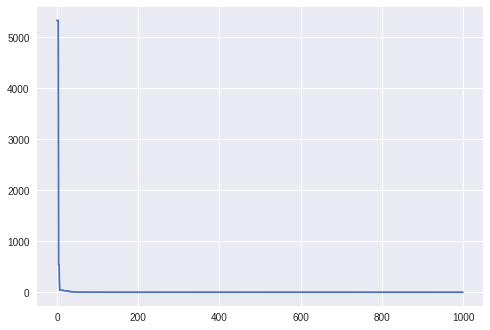

In [0]:
nsa = 30
max_iter = 1000

lb = -10
ub = 10
dim = 10

bFlameScore, bFlamesPos, convergenceCurve = MFO(nsa, dim, ub, lb, max_iter, F2)

print(bFlameScore)
x = np.arange(0, max_iter, 1)
plt.plot(x, convergenceCurve)